In [10]:
import sys
sys.path.append('../../lib')

from common import *
from graph import *

In [11]:
class Node:
    
    def __init__(self, k):
        self.key = k
        self.left = self.right = self.p = None
    
    def copySatelliteData(self, o):
        pass
    
    def __str__(self):
        return str(self.key)
    

In [12]:
class BinarySearchTree:
    
    def __init__(self):
        self.root = None
    
    def search(self, k):
        x = self.root
        
        while x != None and x.key != k:
            if k < x.key:
                x = x.left
            else:
                x = x.right
        
        return x

    def minimum(self, x = None):
        if x is None:
            x = self.root
        
        while x != None and x.left != None:
            x = x.left
        
        return x

    def maximum(self, x = None):
        if x is None:
            x = self.root
        
        while x != None and x.right != None:
            x = x.right
        
        return x

    def successor(self, x):
        if x.right != None:
            return self.minimum(x.right)
        
        y = x.p
        while y != None and x == y.right:
            x = y
            y = y.p
    
        return y
    
    def predecessor(self, x):
        if x.left != None:
            return self.maximum(x.left)
        
        y = x.p
        while y != None and x == y.left:
            x = y
            y = y.p
    
        return y
    
    def insert(self, z):
        y = None
        x = self.root
        
        while x != None:
            y = x
            if z.key < x.key:
                x = x.left
            else:
                x = x.right
        
        z.p = y
        if y == None:
            self.root = z
        elif z.key < y.key:
            y.left = z
        else:
            y.right = z
    
    def delete(self, z):
        if z.left == None or z.right == None:
            y = z
        else:
            y = self.successor(z)
        
        if y.left != None:
            x = y.left
        else:
            x = y.right
        
        if x != None:
            x.p = y.p
        
        if y.p == None:
            self.root = x
        elif y == y.p.left:
            y.p.left = x
        else:
            y.p.right = x
        
        if y != z:
            z.key = y.key
            y.copySatelliteData(z)
        
        return y
            
    def walk(self, x = None, deep = 1, space = 3):
        if x == None:
            x = self.root
        
        if x == None:
            return
    
        print('{}{}{}'.format(deep, '+' * space, x.key))
        
        if x.left != None:
            self.walk(x.left, deep + 1, space + 3)
        
        if x.right != None:
            self.walk(x.right, deep + 1, space + 3)
    


original:


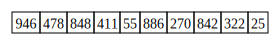

In [13]:
n = 10
data = gen_data(n)


draw_array('original:', data)


sorted:


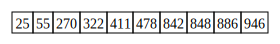

In [14]:
sorted_data = sort(data)
draw_array('sorted:', sorted_data)


tree:


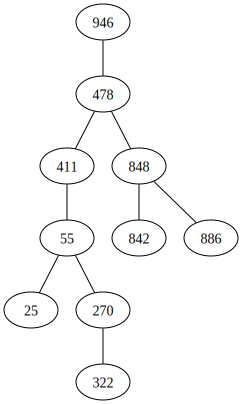

In [15]:
t = BinarySearchTree()


for x in data:
    t.insert(Node(x))
    
draw_tree('tree:', t)


In [16]:
k = data[n // 2]

x = t.search(k)
print ('search({}):'.format(k), x)


search(886): 886


In [17]:
predecessor = t.predecessor(x)
print ('predecessor({}):'.format(k), predecessor)

successor = t.successor(x)
print ('successor({}):'.format(k), successor)

print ('minimum:', t.minimum())

print ('maximum:', t.maximum())


predecessor(886): 848
successor(886): 946
minimum: 25
maximum: 946


delete(322): 322


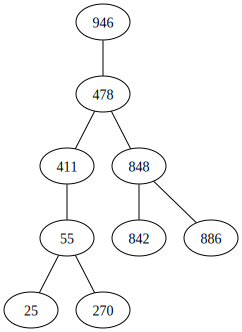

--------------------------------------------------------------------------------
delete(25): 25


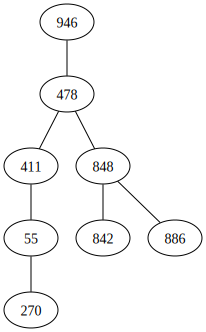

--------------------------------------------------------------------------------
delete(411): 411


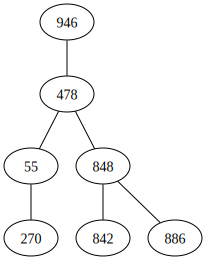

--------------------------------------------------------------------------------
delete(270): 270


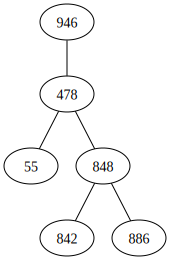

--------------------------------------------------------------------------------
delete(478): 842


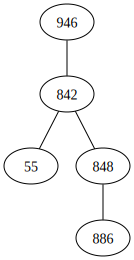

--------------------------------------------------------------------------------
delete(55): 55


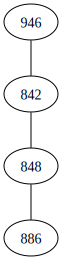

--------------------------------------------------------------------------------
delete(848): 848


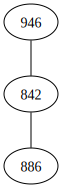

--------------------------------------------------------------------------------
delete(946): 946


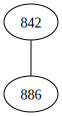

--------------------------------------------------------------------------------
delete(886): 886


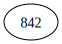

--------------------------------------------------------------------------------
delete(842): 842


--------------------------------------------------------------------------------


In [18]:
shuffled_data = shuffle(data)
for k in shuffled_data:
    x = t.search(k)    
    t.delete(x)
    
    draw_tree('delete({}): {}'.format(k, x), t)
    br()
